### Mini Project: Rakamin Academy
# **Investigate Hotel Business using Data Visualization**

Author : Muhammad Zulfarhan - Data Science Batch 42

---
<br>


# **Load Dataset**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('hotel_bookings_data.csv')

In [ ]:
df.sample(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
116399,City Hotel,0,166,2019,September,28,14,2,3,2,...,0,No Deposit,9.0,NaN,0,Personal,116.1,0,0,Check-Out
32000,Resort Hotel,0,4,2019,March,2,13,0,1,2,...,0,No Deposit,314.0,NaN,0,Family,38.4,0,0,Check-Out
12324,Resort Hotel,1,331,2019,August,25,24,2,5,2,...,0,No Deposit,314.0,NaN,0,Personal,59.4,0,1,Canceled


# **Exploration Data Analysis**
Understanding the characteristics and information contained within the data being used.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

- The dataset contains **119390** records and **29** features
- Data type : **object, float64, int64**
<br>
<br>

In [ ]:
# Check the value of each feature
for col in df.columns:
    print("{} have {} unique values: {}".format(col, df[col].nunique(), df[col].dtypes))
    if df[col].dtypes == 'int64' or df[col].dtypes == 'float64' or df[col].dtypes == 'object':
        print("{} values: {}".format(col,df[col].unique()))
        print('-' * 100)

hotel have 2 unique values: object
hotel values: ['Resort Hotel' 'City Hotel']
----------------------------------------------------------------------------------------------------
is_canceled have 2 unique values: int64
is_canceled values: [0 1]
----------------------------------------------------------------------------------------------------
lead_time have 479 unique values: int64
lead_time values: [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 46

- The presence of the value **'Undefined'** in the `meal`, `market_segment`, `distribution_channel`features will be further analyzed to determine whether it needs to be handled.
- The **`company`** and **`agent`** features have float values, likely referring to **id** atau **value yang telah di encoding**
- The features indicating the number of guests, namely `adults`, `children`, and `babies`, will be further analyzed to identify any anomalies in the data.
<br>
<br>

### Checking Null Values
---

In [ ]:
# cek missing value
((df.isna().sum())/len(df)*100).round(2).sort_values(ascending=False)

,0
company,94.31
agent,13.69
city,0.41
hotel,0.00
distribution_channel,0.00
total_of_special_requests,0.00
required_car_parking_spaces,0.00
adr,0.00
customer_type,0.00
days_in_waiting_list,0.00


- There are **missing/null value** in the `company`, `city`, `children`, `agent` features
- Imputation of missing values will be performed later
<br>
<br>

### Checking Duplicated Data
---

In [ ]:
# cek data duplicat
df.duplicated().sum()

33261

- Duplicate data will be removed, leaving only one unique value
<br>
<br>

### Statistical Descriptive
---

#### Numerical Feature

In [ ]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.37,0.48,0.00,0.00,0.00,1.0,1.0
lead_time,119390.0,104.01,106.86,0.00,18.00,69.00,160.0,737.0
arrival_date_year,119390.0,2018.16,0.71,2017.00,2018.00,2018.00,2019.0,2019.0
arrival_date_week_number,119390.0,27.17,13.61,1.00,16.00,28.00,38.0,53.0
arrival_date_day_of_month,119390.0,15.80,8.78,1.00,8.00,16.00,23.0,31.0
stays_in_weekend_nights,119390.0,0.93,1.00,0.00,0.00,1.00,2.0,19.0
stays_in_weekdays_nights,119390.0,2.50,1.91,0.00,1.00,2.00,3.0,50.0
adults,119390.0,1.86,0.58,0.00,2.00,2.00,2.0,55.0
children,119386.0,0.10,0.40,0.00,0.00,0.00,0.0,10.0
babies,119390.0,0.01,0.10,0.00,0.00,0.00,0.0,10.0


The `adr` feature, **Averange Daily Rate** (room revenue/number of rooms sold), contains **negative values**. This is an **anomaly** and needs to be dropped.
<br>
<br>

<ipython-input-56-ea184af3ea48>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[nums[i]])
<ipython-input-56-ea184af3ea48>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[nums[i]])
<ipython-input-56-ea184af3ea48>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in

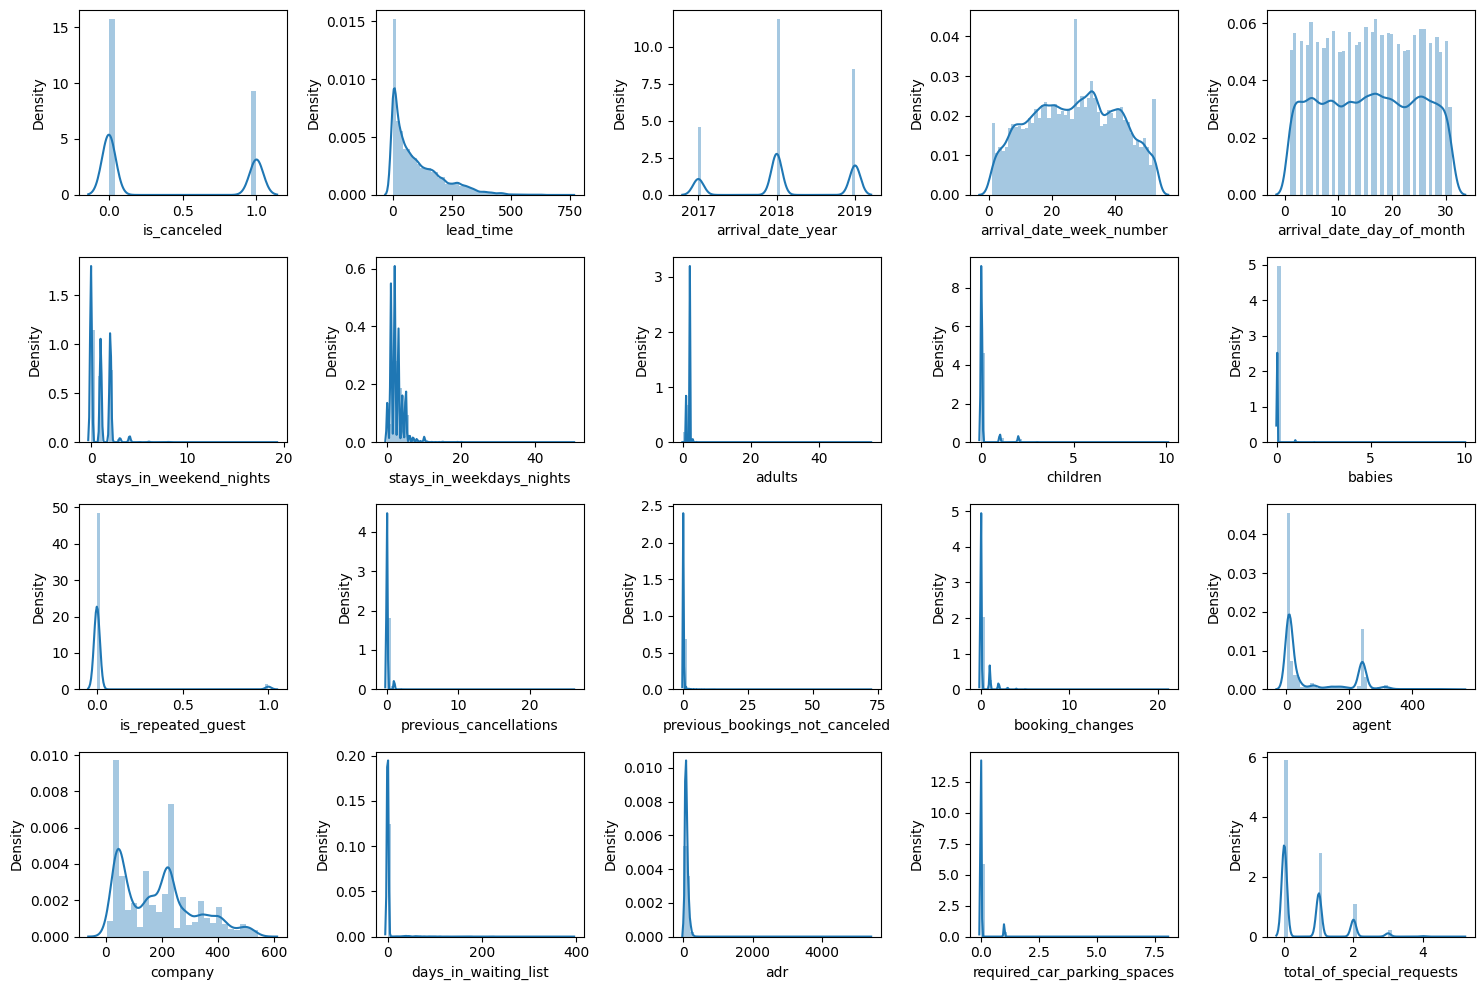

In [ ]:
# Check the distribution of numerical features
nums = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == float)].columns.tolist()

plt.figure(figsize=(15, 10))
for i in range(0, len(nums)):
    plt.subplot(4, 5, i+1)
    sns.distplot(df[nums[i]])
    plt.tight_layout()

- Overall, the features tend to be **positively skewed**
- `arrival_date_week_number` and `arrival_date_day_of_month` have distributions that tend to be normal
<br>

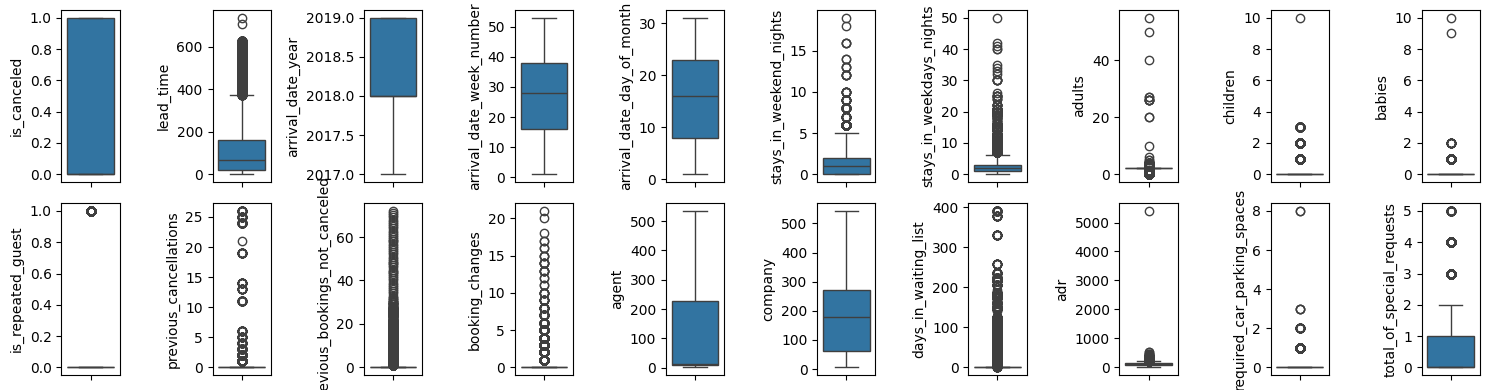

In [ ]:
# Check for outliers in the numerical features
plt.figure(figsize=(15, 4))
for i in range(0, len(nums)):
    plt.subplot(2, 10, i+1)
    sns.boxplot(y=df[nums[i]], orient='v')
    plt.tight_layout()

- Overall, most features have outliers
- **Extreme values** are observed in the `adr`, `required_car_parking_spaces`, `children`, and `babies` features
- Handling outlier will involve removing only the extreme values to ensure that insights are not compromised
<br>
<br>

Check for anomalies where the number of guests equals 0, indicating rooms were booked but no guests stayed

In [ ]:
guest_0 = df['adults']+df['children']+df['babies']
guest_0 = df[guest_0 == 0]
guest_0.shape[0]

180

- There are **180 rooms with no guests**
- This data will be **dropped**
<br>
<br>

#### Categorical Feature

In [ ]:
df.describe(exclude=np.number).round(2).T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,October,13877
meal,119390,5,Breakfast,92310
city,118902,177,Kota Denpasar,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Personal,89613
reservation_status,119390,3,Check-Out,75166


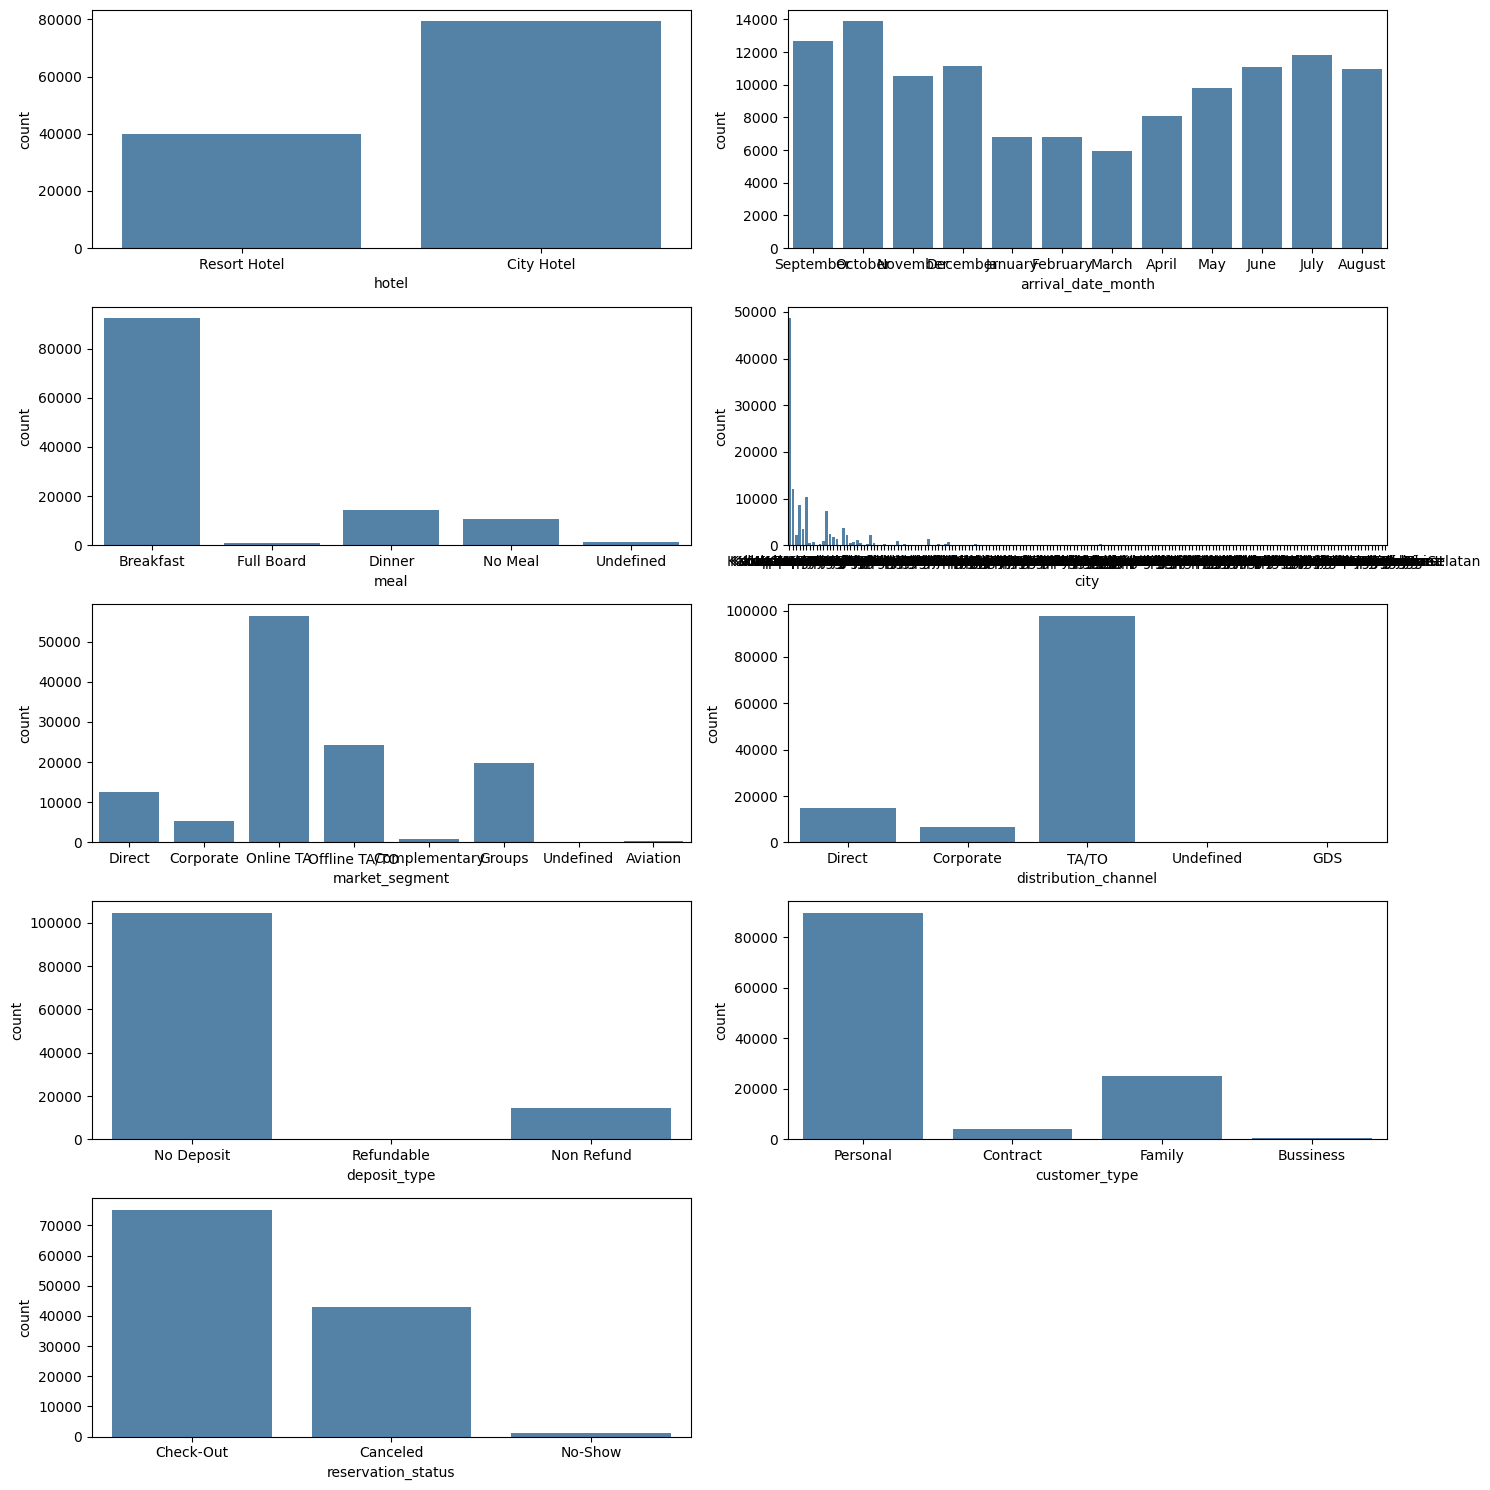

In [ ]:
# Check the distribution of categorical features
cats = df.loc[:, (df.dtypes == 'object')].columns.tolist()
plt.figure(figsize=(15, 15))
for i in range(0, len(cats)):
    plt.subplot(5, 2, i+1)
    sns.countplot(x=df[cats[i]], color='steelblue')
    plt.tight_layout()

# **Data Cleansing**

In [ ]:
df_clean = df.copy()

### Handling Null Values
---

The features with null values are `company, city, children, agent` <br>
Treatment :
- `company` - null values **filled with 0**, indicating the guest did not come from a company
- `agent` - null values **filled with 0**, indicating the guest made a reservation independently or not through an agent
- `children` - null values **filled with 0**, indicating the guest did not bring children
- `city` - null values **filled with 'Undefined'**, as the city is not definitively known

In [ ]:
# company, agent, children
ft = ['company', 'children', 'agent']
for col in ft:
    df_clean[col].fillna(0, inplace=True)

# city
df_clean['city'].fillna('Undefined', inplace=True)

In [ ]:
df_clean.isna().sum().sum()

0

### Handling Inconsistent and Extream Values
---

The `meal` can be categorized into two groups: 'Yes Meal' and 'No Meal'
- **'Yes Meal'** = Breakfast, Full Board, Dinner
- **'No Meal'** = No Meal, Undefined

In [ ]:
df_clean['meal'].replace('Undefined', 'No Meal', inplace = True)
df_clean['meal'].replace(['Breakfast', 'Full Board', 'Dinner'], 'Yes Meal', inplace = True)

In [ ]:
df_clean['meal'].unique()

array(['Yes Meal', 'No Meal'], dtype=object)

<br>

The **`Children`** feature should use the integer datatype

In [ ]:
df_clean['children'] = df_clean['children'].astype('int64')

<br>
Remove extreme values from the data

In [ ]:
# extream adr
index_adr = df_clean[(df_clean['adr'] < 0) | (df_clean['adr'] > 5000)]
df_clean.drop(index = index_adr.index, inplace=True)

# required_car_parking_spaces
index_parking = df_clean[(df_clean['required_car_parking_spaces'] == 8)]
df_clean.drop(index = index_parking.index, inplace=True)

# babies
index_bb = df_clean[(df_clean['babies'] > 8)]
df_clean.drop(index = index_bb.index, inplace=True)

# children
index_ch = df_clean[(df_clean['children'] == 10)]
df_clean.drop(index = index_ch.index, inplace=True)

# no guests
index_guest_0 = df_clean['adults']+df_clean['children']+df_clean['babies']
index_guest_0 = df_clean[index_guest_0 == 0]
df_clean.drop(index = index_guest_0.index, inplace=True)

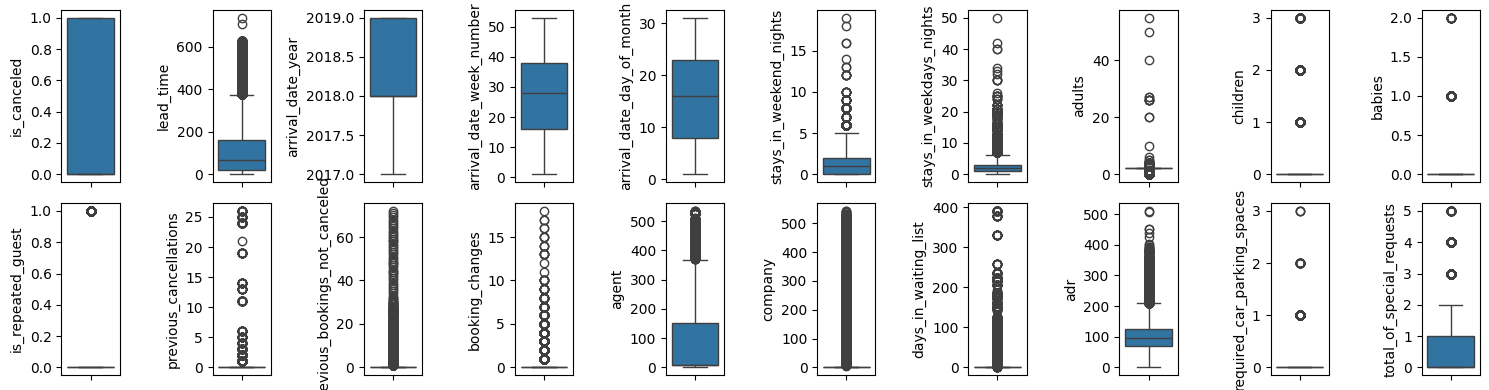

In [ ]:
# Check for outliers in the numerical features
plt.figure(figsize=(15, 4))
for i in range(0, len(nums)):
    plt.subplot(2, 10, i+1)
    sns.boxplot(y=df_clean[nums[i]], orient='v')
    plt.tight_layout()

### Handling Duplicated Data
---

In [ ]:
df_clean.sample(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
97276,City Hotel,0,346,2018,November,38,13,0,2,2,...,0,No Deposit,6.0,0.0,0,Family,115.00,0,1,Check-Out
29739,Resort Hotel,0,75,2018,December,44,29,2,5,2,...,0,No Deposit,240.0,0.0,0,Personal,55.43,1,1,Check-Out


Based on further analysis, duplicate data will not be removed due to the following reasons:
- The large number of duplicates, and removing them could affect the statistical values in the analysis
- The dataset does not contain a unik_id/unik_booking_id and date, so duplicate data might contain important information. It is possible that the same booking occurred at different times.

In [ ]:
print('Total Records Before Cleaned :', df.shape[0])
print('Total Records After Cleaned :', df_clean.shape[0])

Total Records Before Cleaned : 119390
Total Records After Cleaned : 119203


# **Data Visualization**

## **Monthly Hotel Booking Analysis Based on Hotel Type**

In [ ]:
# read that has been previously cleaned
df_c = df_clean.copy()

### Ratio Total Booking
---

In [ ]:
# Summary total booking percentage
# Group the hotel feature and aggregate using count
hotel_type = df_c.groupby('hotel')[['hotel']].count()

hotel_type.columns = ['total']
hotel_type.reset_index(inplace=True)
hotel_type

,hotel,total
0,City Hotel,79160
1,Resort Hotel,40043


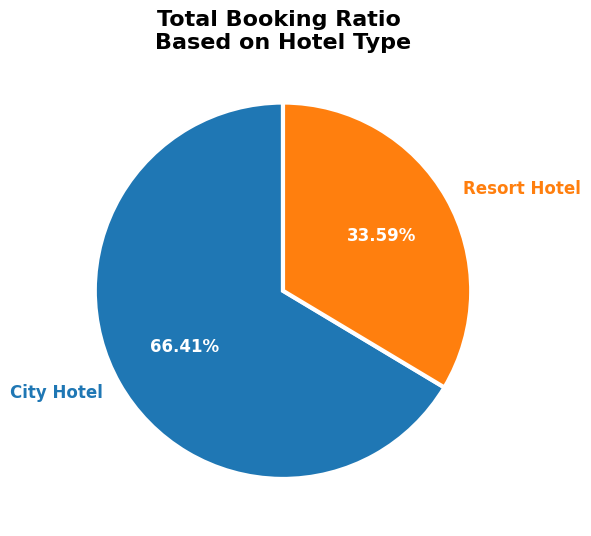

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))

patches, texts, pcts = ax.pie(
    hotel_type['total'], labels=hotel_type['hotel'], autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'large'},
    startangle=90)

for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white', fontweight='bold')
plt.setp(texts, fontweight=600)
ax.set_title('Total Booking Ratio \nBased on Hotel Type', fontsize=16, pad=5, loc='center',fontweight='bold')
plt.tight_layout()

- **City Hotels are booked 66.41% more frequently by customers**.
- It is suspected that the majority of customers booking City Hotels are **tourists whose primary activities are around the area they are staying in**, rather than having the hotel itself as their main destination.
- City hotels are typically located in city centers or urban areas, close to tourist attractions and business districts. They are usually designed to provide comfort and easy access to city facilities and activities, such as restaurants, shopping centers, and tourist spots.
- Meanwhile, the other 33.59% are customers of Resort Hotels. These customers are likely booking with the intent to vacation and relax, as resort hotels are usually located in scenic areas such as beachfronts, mountains, or quiet rural settings, offering comprehensive amenities.
<br>
<br>

### Ratio Total Booking per Month
---

In [ ]:
# Create a summary of the total booking aggregation per month
monthly_booking = df_c.groupby(['hotel', 'arrival_date_month'])['arrival_date_year'].agg(['nunique', 'count']).reset_index()
monthly_booking

,hotel,arrival_date_month,nunique,count
0,City Hotel,April,2,4950
1,City Hotel,August,2,7885
2,City Hotel,December,2,7593
3,City Hotel,February,2,4114
4,City Hotel,January,2,4336
5,City Hotel,July,2,8221
6,City Hotel,June,2,7469
7,City Hotel,March,2,3729
8,City Hotel,May,2,6433
9,City Hotel,November,2,7392


It can be observed that the majority of months in the dataset have a value of 2 in the "nunique" column, except for the months of **October** and **September**. This may affect the calculation values and result in less valid outcomes. To address this, normalization will be performed by calculating the **average** (total/nunique).

#### Normalization

In [ ]:
# Calculate the average by dividing the count by nunique
monthly_booking['average'] = round(monthly_booking['count']/monthly_booking['nunique'])
monthly_booking

,hotel,arrival_date_month,nunique,count,average
0,City Hotel,April,2,4950,2475.0
1,City Hotel,August,2,7885,3942.0
2,City Hotel,December,2,7593,3796.0
3,City Hotel,February,2,4114,2057.0
4,City Hotel,January,2,4336,2168.0
5,City Hotel,July,2,8221,4110.0
6,City Hotel,June,2,7469,3734.0
7,City Hotel,March,2,3729,1864.0
8,City Hotel,May,2,6433,3216.0
9,City Hotel,November,2,7392,3696.0


#### Sort Month Value

In [ ]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_booking['month'] = monthly_booking['arrival_date_month'].str[:3]
monthly_booking['month'] = pd.Categorical(monthly_booking['month'], categories=months)
monthly_booking.sort_values('month')

,hotel,arrival_date_month,nunique,count,average,month
4,City Hotel,January,2,4336,2168.0,Jan
16,Resort Hotel,January,2,2435,1218.0,Jan
3,City Hotel,February,2,4114,2057.0,Feb
15,Resort Hotel,February,2,2645,1322.0,Feb
7,City Hotel,March,2,3729,1864.0,Mar
19,Resort Hotel,March,2,2191,1096.0,Mar
0,City Hotel,April,2,4950,2475.0,Apr
12,Resort Hotel,April,2,3102,1551.0,Apr
20,Resort Hotel,May,2,3331,1666.0,May
8,City Hotel,May,2,6433,3216.0,May


#### Visualization

Text(10, 4800, 'Holiday Season II')

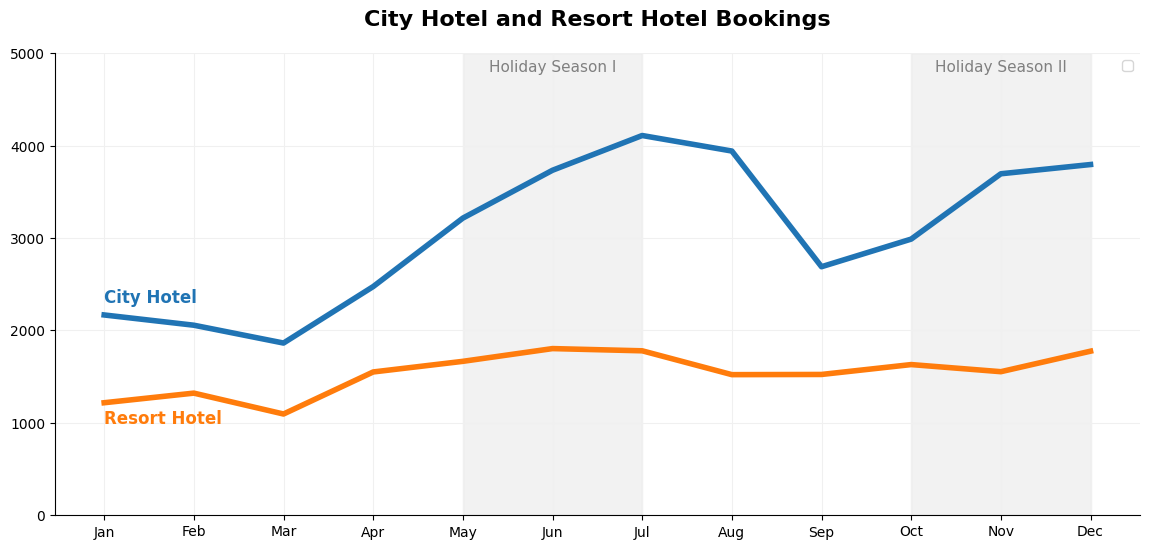

In [ ]:
plt.style.use('default')
fig, ax = plt.subplots()
fig.set_size_inches(14,6)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Create the plot
sns.lineplot(x='month', y='average', hue='hotel', data= monthly_booking, palette=['#2074b4', '#ff7c0c'], linewidth=4)
plt.grid(color='#f0f0f0')
plt.ylim(0,5000)

# Setting the label
plt.tick_params(axis='both', which='major', labelsize=10)
plt.ylabel('')
plt.xlabel('')

# Legend
plt.legend([])
plt.text(x=0, y=2300, s='City Hotel', fontsize=12, color='#2074b4', ha='left', fontweight='bold')
plt.text(x=0, y=990, s='Resort Hotel', fontsize=12, color='#ff7c0c', ha='left', fontweight='bold')

# Add the title
plt.title('City Hotel and Resort Hotel Bookings', fontsize=16, pad=20, loc='center',fontweight='bold')

#set holiday season I
plt.stackplot([4, 5, 6], [5000], color='grey', alpha=0.1)
plt.text(x=5, y=4800, s='Holiday Season I', fontsize=11, color='grey', ha='center')

#set holiday season II
plt.stackplot([9, 10, 11], [5000], color='grey', alpha=0.1)
plt.text(x=10, y=4800, s='Holiday Season II', fontsize=11, color='grey', ha='center')


- During the holiday season, hotel bookings tend to increase.
- Bookings for both types of hotels peak during the **May - August** period, with City Hotels experiencing a particularly significant rise during this time. This can be attributed to the fact that from **2017-2019**, the months of May to August not only coincide with **school holidays**, but also align with numerous **national holidays**, such as extended leave periods and religious events like Ramadan and Eid. These factors provide ample opportunities for people to take vacations, travel out of town, and book hotels. Additionally, the **October - December** holiday season coincides with **Christmas** and **New Year's** celebrations.
- The lowest booking rates occur during the January - March period. This may be due to the limited number of national holidays, the start of a new academic year for students, and lower business travel activity as it is still the beginning of the year.

## **Impact Analysis of Stay Duration on Hotel Bookings Cancelation Rate**

### Total Cancelation Rate
---

In [ ]:
df_city = df_c[df_c['hotel']=='City Hotel']

# group the is_canceled feature and aggregate using count
cancel = df_city.groupby('is_canceled')[['is_canceled']].count()

cancel.columns = ['total']
cancel.reset_index(inplace=True)

lgn = {0: 'Not Canceled',
       1: 'Canceled'}
cancel['is_canceled'] = cancel['is_canceled'].map(lgn)
cancel


,is_canceled,total
0,Not Canceled,46082
1,Canceled,33078


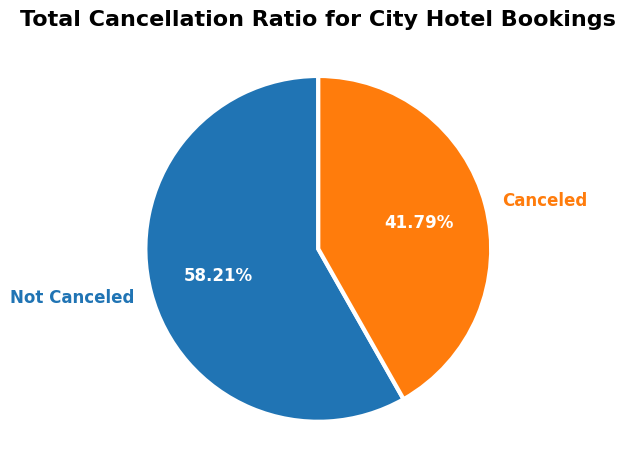

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))

patches, texts, pcts = ax.pie(
    cancel['total'], labels=cancel['is_canceled'], autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'large'},
    startangle=90, colors=['#2074b4', '#ff7c0c'])

for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white', fontweight='bold')
plt.setp(texts, fontweight=600)
ax.set_title('Total Cancellation Ratio for City Hotel Bookings', fontsize=16, pad=5, loc='center',fontweight='bold')
plt.tight_layout()

In [ ]:
df_resort = df_c[df_c['hotel']=='Resort Hotel']

# group the is_canceled feature and aggregate using count
cancel = df_resort.groupby('is_canceled')[['is_canceled']].count()

cancel.columns = ['total']
cancel.reset_index(inplace=True)

lgn = {0: 'Not Canceled',
       1: 'Canceled'}
cancel['is_canceled'] = cancel['is_canceled'].map(lgn)
cancel


,is_canceled,total
0,Not Canceled,28924
1,Canceled,11119


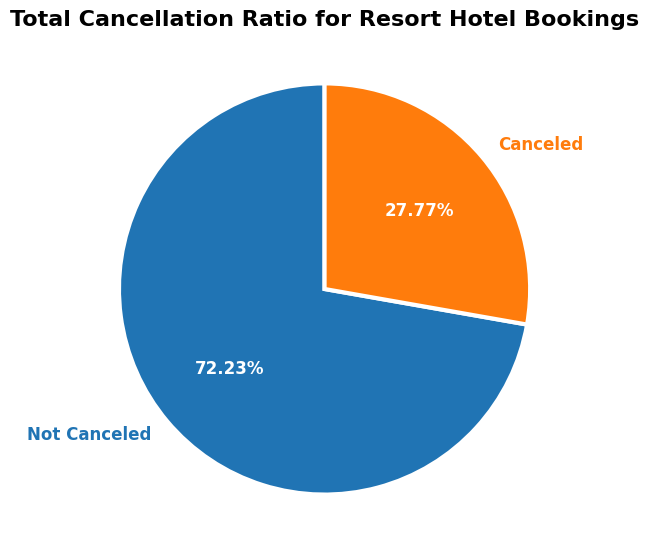

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))

patches, texts, pcts = ax.pie(
    cancel['total'], labels=cancel['is_canceled'], autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'large'},
    startangle=90, colors=['#2074b4', '#ff7c0c'])

for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white', fontweight='bold')
plt.setp(texts, fontweight=600)
ax.set_title('Total Cancellation Ratio for Resort Hotel Bookings', fontsize=16, pad=5, loc='center',fontweight='bold')
plt.tight_layout()

City Hotels also have a higher cancellation rate compared to Resort Hotels. This indicates that customers booking City Hotels tend to cancel their reservations more frequently. Since City Hotels are centrally located in urban areas, near tourist attractions and business districts, it can be assumed that many activities need to be coordinated, and other factors may influence customers to cancel their bookings.<br>
<br>

### Stay Duration
---

The length of stay booked by customers can be seen in the features `stays_in_weekdays_nights` and `stays_in_weekend_nights`

In [ ]:
# total stay
df_c['total_stay_duration'] = df_c['stays_in_weekdays_nights'] + df_c['stays_in_weekend_nights']
df_c.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_stay_duration
3594,Resort Hotel,1,0,2017,February,52,25,0,1,2,...,Non Refund,240.0,0.0,0,Personal,55.0,0,0,No-Show,1
81512,City Hotel,0,29,2018,June,15,5,0,3,1,...,No Deposit,0.0,40.0,0,Family,67.0,1,0,Check-Out,3
96826,City Hotel,0,40,2018,November,37,7,0,2,2,...,No Deposit,14.0,0.0,0,Personal,158.4,1,0,Check-Out,2
103547,City Hotel,0,3,2018,February,52,24,2,2,3,...,No Deposit,9.0,0.0,0,Personal,110.5,0,1,Check-Out,4
55899,City Hotel,1,109,2018,October,35,24,0,4,3,...,No Deposit,9.0,0.0,0,Personal,152.1,0,0,Canceled,4


To observe the range of stay durations in the dataset, it can be analyzed through the distribution in a histogram

<Axes: xlabel='total_stay_duration', ylabel='Count'>

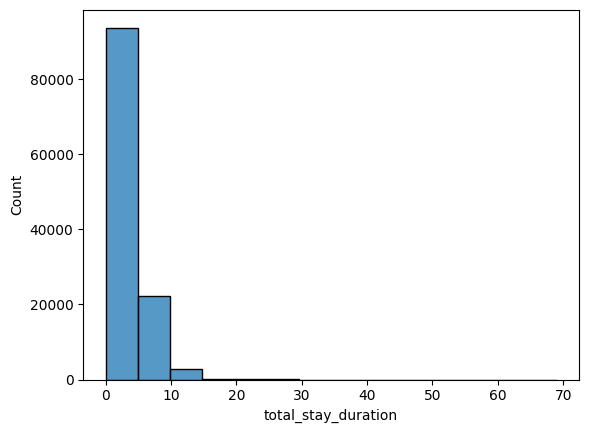

In [ ]:
# Total distribution
sns.histplot(df_c['total_stay_duration'], binwidth=5)

In [ ]:
unik = df_c['total_stay_duration'].nunique()
mx = df_c['total_stay_duration'].max()
mn = df_c['total_stay_duration'].min()

print('Unique value:', unik)
print('Max duration:', mx)
print('Min duration:', mn)

Unique value: 42
Max duration: 69
Min duration: 0


Key Takeaways:
The total stay duration for customers ranges from 0 to 69 days. To simplify interpretation, the durations will be categorized by week:

- **< 1**: 0 - 7 days
- **1 - 2**: 8 - 14 days
- **2 - 3**: 15 - 21 days
- **3 - 4**: 22 - 28 days
- **> 4**: More than 28 days

In [ ]:
df_c['total_stay_week'] = np.where((df_c['total_stay_duration']) < 8, '< 1' ,
                                   np.where((df_c['total_stay_duration']) < 15, '1-2',
                                   np.where((df_c['total_stay_duration']) < 22, '2-3',
                                   np.where((df_c['total_stay_duration']) < 29, '3-4', '> 4'))))

In [ ]:
df_c['total_stay_week'].value_counts()

,count
total_stay_week,
< 1,113979
1-2,4795
2-3,274
3-4,108
> 4,47


<br>

### Cancelation Rate by Stay Duration
---

In [ ]:
# Group cancel rate based on hotel type,duration
cancel_rate = df_c.groupby(['hotel', 'total_stay_week']).agg({'is_canceled' : 'sum', 'arrival_date_day_of_month' : 'count'}).reset_index()
cancel_rate['cancel_rate'] = 100*(cancel_rate['is_canceled'] / cancel_rate['arrival_date_day_of_month']).round(2)
cancel_rate

# --------------------------------------------------------------------------------------------------------------------------------------
# Sorted by week
week = ['< 1', '1-2', '2-3', '3-4', '> 4']
cancel_rate['total_stay_week'] = pd.Categorical(cancel_rate['total_stay_week'], categories = week)
cancel_rate = cancel_rate.sort_values('total_stay_week')
cancel_rate

,hotel,total_stay_week,is_canceled,arrival_date_day_of_month,cancel_rate
3,City Hotel,< 1,32403,77939,42.0
8,Resort Hotel,< 1,9917,36040,28.0
0,City Hotel,1-2,558,1069,52.0
5,Resort Hotel,1-2,1077,3726,29.0
1,City Hotel,2-3,76,105,72.0
6,Resort Hotel,2-3,79,169,47.0
2,City Hotel,3-4,21,25,84.0
7,Resort Hotel,3-4,39,83,47.0
4,City Hotel,> 4,20,22,91.0
9,Resort Hotel,> 4,7,25,28.0


#### Visualization

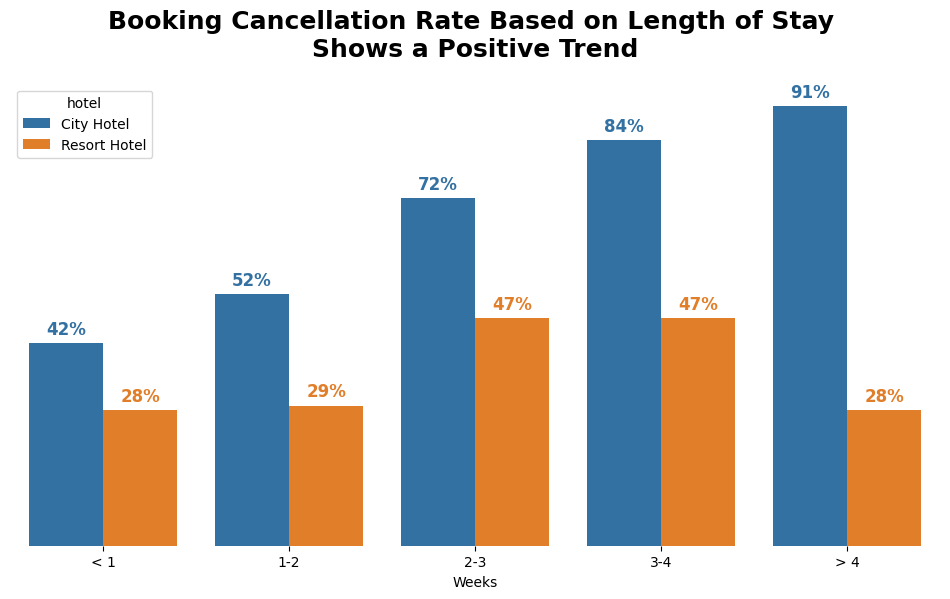

In [ ]:
plt.style.use('default')
fig, ax = plt.subplots()
fig.set_size_inches(12,6)

# Set border
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

# Plot
ax = sns.barplot(x = cancel_rate['total_stay_week'], y = cancel_rate['cancel_rate'], hue=cancel_rate['hotel'],
                 hue_order = ['City Hotel', 'Resort Hotel'], palette=['#2074b4', '#ff7c0c'])

# Setting the label
plt.tick_params(axis = 'y', which = 'both', left = False, right = False, labelleft = False)
plt.ylabel('')
plt.xlabel('Weeks')

# Add the title
plt.title('Booking Cancellation Rate Based on Length of Stay \nShows a Positive Trend', fontsize=18, pad=20, loc='center',fontweight='bold')

patches
for a in ax.patches:
    txt = np.round(a.get_height(), decimals=2)
    anot = str(round(txt))
    color = a.get_facecolor()
    if anot== '0':
      pass
    else:
      ax.annotate(anot+'%', (a.get_x()+a.get_width()/2, a.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points', fontsize=12, fontweight='bold', color=color)

- Overall, hotel bookings with longer stay durations tend to have a higher cancellation rate. However, for stays longer than 4 weeks, Resort Hotels have a lower cancellation rate.
- **The cancellation rate increases as the length of stay booked becomes longer for both hotel types**.
- For City Hotels, bookings with a stay duration of more than 2 weeks have a cancellation rate of over 50%. In particular, for stays longer than a month, only 1 out of 10 people does not cancel their booking. This high cancellation rate indicates that the company should develop effective strategies to reduce cancellations.

## **Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate**

### Duration of Lead Time
---

To observe the range of lead times in the dataset, it can be analyzed through the distribution in a histogram

<Axes: xlabel='lead_time', ylabel='Count'>

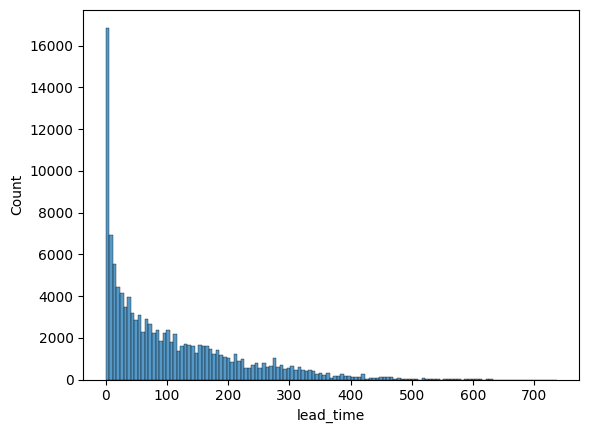

In [ ]:
# Lead time distribution
sns.histplot(df_c['lead_time'])

In [ ]:
unik = df_c['lead_time'].nunique()
mx = df_c['lead_time'].max()
mn = df_c['lead_time'].min()

print('Unique value:', unik)
print('Max duration:', mx)
print('Min duration:', mn)

Unique value: 479
Max duration: 737
Min duration: 0


Lead time ranges from 0 to 737 days. To simplify interpretation, it will be categorized by month.

In [ ]:
df_c['lead_category'] = np.where((df_c['lead_time']) < 31, '1',
                        np.where((df_c['lead_time']) <= 61, '2',
                        np.where((df_c['lead_time']) <= 91, '3',
                        np.where((df_c['lead_time']) <= 121, '4',
                        np.where((df_c['lead_time']) <= 151, '5',
                        np.where((df_c['lead_time']) <= 181, '6',
                        np.where((df_c['lead_time']) <= 211, '7',
                        np.where((df_c['lead_time']) <= 241, '8',
                        np.where((df_c['lead_time']) <= 271, '9',
                        np.where((df_c['lead_time']) <= 301, '10',
                        np.where((df_c['lead_time']) <= 331, '11',
                        np.where((df_c['lead_time']) <= 361, '12', '>1 tahun'))))))))))))

In [ ]:
# Check column
df_c['lead_category'].value_counts()

,count
lead_category,
1,38578
2,17462
3,12398
4,10359
5,8237
6,7784
7,5609
8,4180
10,3524


<br>

### Cancelation Rate by Lead Time
---

In [ ]:
# Summmary
lead_cancel = df_c.groupby(['hotel', 'lead_category']).agg({'is_canceled' : 'sum', 'arrival_date_day_of_month' : 'count'}).reset_index()
lead_cancel['lead_cr'] = 100*(lead_cancel['is_canceled'] / lead_cancel['arrival_date_day_of_month']).round(2)

# Sorted
cat = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '>1 tahun']
lead_cancel['lead_category'] = pd.Categorical(lead_cancel['lead_category'], categories = cat)
lead_cancel = lead_cancel.sort_values('lead_category')
lead_cancel

,hotel,lead_category,is_canceled,arrival_date_day_of_month,lead_cr
0,City Hotel,1,5184,23243,22.0
13,Resort Hotel,1,1984,15335,13.0
4,City Hotel,2,4802,12253,39.0
17,Resort Hotel,2,1593,5209,31.0
5,City Hotel,3,3601,8774,41.0
18,Resort Hotel,3,1279,3624,35.0
19,Resort Hotel,4,1157,2993,39.0
6,City Hotel,4,3464,7366,47.0
20,Resort Hotel,5,1040,2537,41.0
7,City Hotel,5,2574,5700,45.0


#### **Visualization**

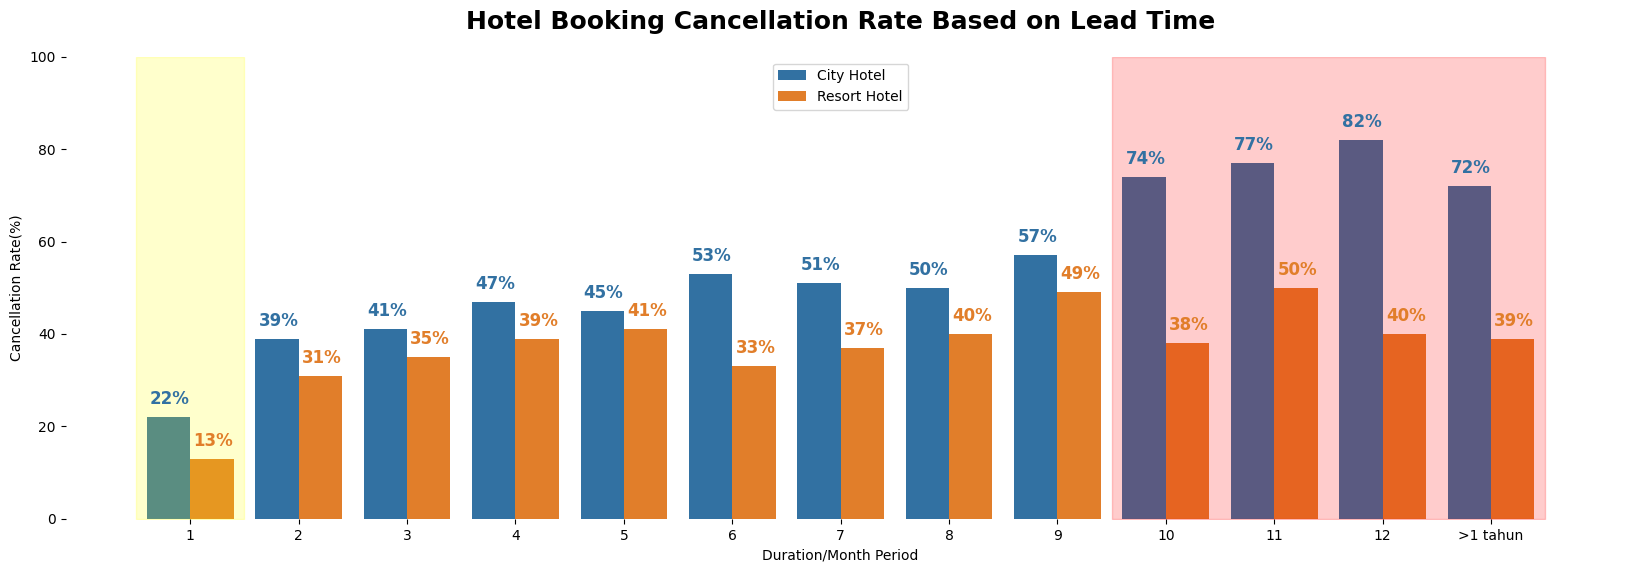

In [ ]:
# Create data visualization
plt.style.use('default')
fig, ax = plt.subplots()
fig.set_size_inches(20,6)

# Set border
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

# Plot
ax = sns.barplot(x = lead_cancel['lead_category'], y = lead_cancel['lead_cr'], hue=lead_cancel['hotel'],
                 hue_order = ['City Hotel', 'Resort Hotel'], palette=['#2074b4', '#ff7c0c'], ax=ax)

plt.ylim(0,100)

# Setting the label
plt.ylabel('Cancellation Rate(%)')
plt.xlabel('Duration/Month Period')
plt.legend(loc='upper center')

# Add the title
plt.title('Hotel Booking Cancellation Rate Based on Lead Time', fontsize=18, pad=20, loc='center',fontweight='bold')

# set cr
plt.stackplot([-0.5, 0.5], [100], color='yellow', alpha=0.2)
plt.stackplot([8.5, 12.5], [100], color='red', alpha=0.2)

patches
for a in ax.patches:
    txt = np.round(a.get_height(), decimals=2)
    anot = str(round(txt))
    color = a.get_facecolor()
    if anot== '0':
      pass
    else:
      ax.annotate(anot+'%', (a.get_x()+a.get_width()/2, a.get_height()),
                ha='center', va='center', xytext=(1, 13),
                textcoords='offset points', fontsize=12, fontweight='bold', color=color)

- Both types of hotels have the lowest cancellation rate for bookings with a lead time of less than one month. City Hotels have a relatively high cancellation ratio, exceeding 50%, for lead times approaching one year, whereas Resort Hotels show a stable cancellation ratio of around 40%.
- Cancellation rates based on lead time are still **dominated by City Hotels**, with a higher cancellation rate as the lead time approaches one year.
- Given the low cancellation rate for bookings with a lead time of less than one month, **the company could implement booking terms with a maximum lead time limit** to reduce the chances of customers canceling due to changing their minds or finding a more desirable hotel. <br>
<br>

# **Conclusion**

#### Business Questions Answer <br>
---

#### Which type of hotel is most frequently visited by customers?

Overall, City Hotels are booked 66.41% more frequently by customers, with a significant increase in the number of customers during the holiday seasons in May-July and October-December. Resort Hotels tend to remain steady, with relatively small increases during holiday seasons compared to City Hotels.<br>
<br>

#### Does the length of stay affect the hotel booking cancellation rate?

The cancellation rate increases as the length of stay booked becomes longer for both types of hotels. In particular, City Hotels have a cancellation rate of over 70-90% for stays longer than 3 weeks. <br>
<br>

#### Does the lead time between hotel booking and guest arrival affect the cancellation rate?

The cancellation rate increases as the lead time lengthens for both types of hotels. The lowest cancellation rate occurs when the lead time is less than one month.
<br>
<br>